# Name: Sufiyan Ahmed Khan
### Student ID: 104324322
### Model-1.

<h1 style="color: Green;">Part 1: Predict Using the Numerical Data</h2>

<h2 style="color: blue;">1. Exploratory Data Analysis (EDA) on Numerical Data</h2>

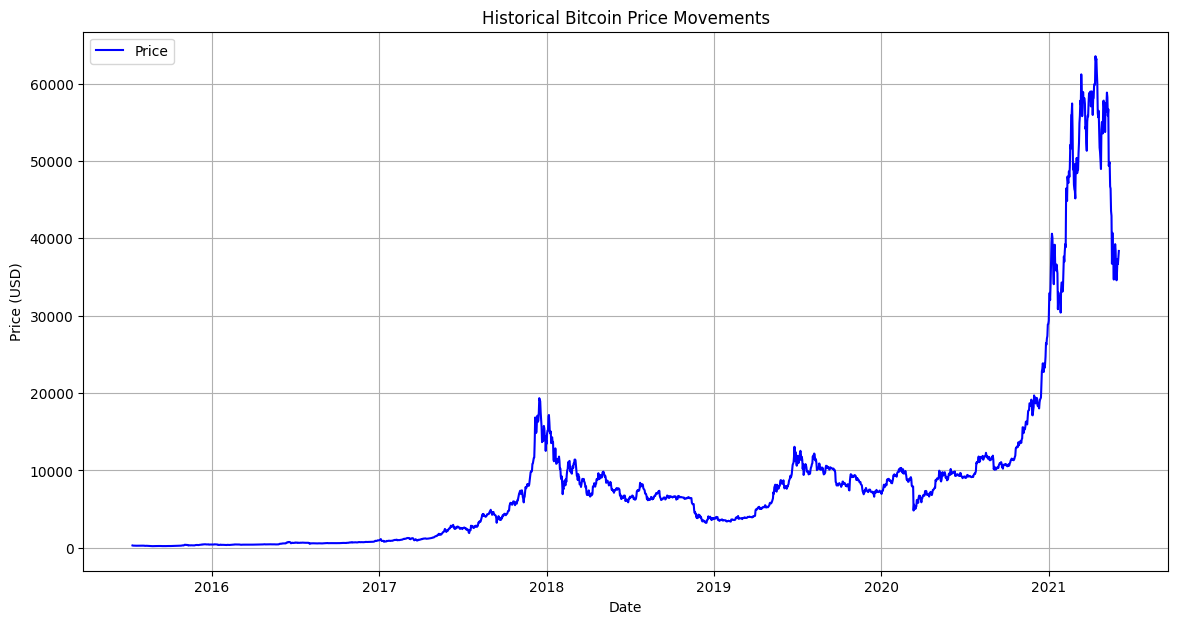

1. Historical Bitcoin Price Movements:
Above plot shows the historical price movements of Bitcoin over time, allowing us to identify trends and fluctuations in its value.



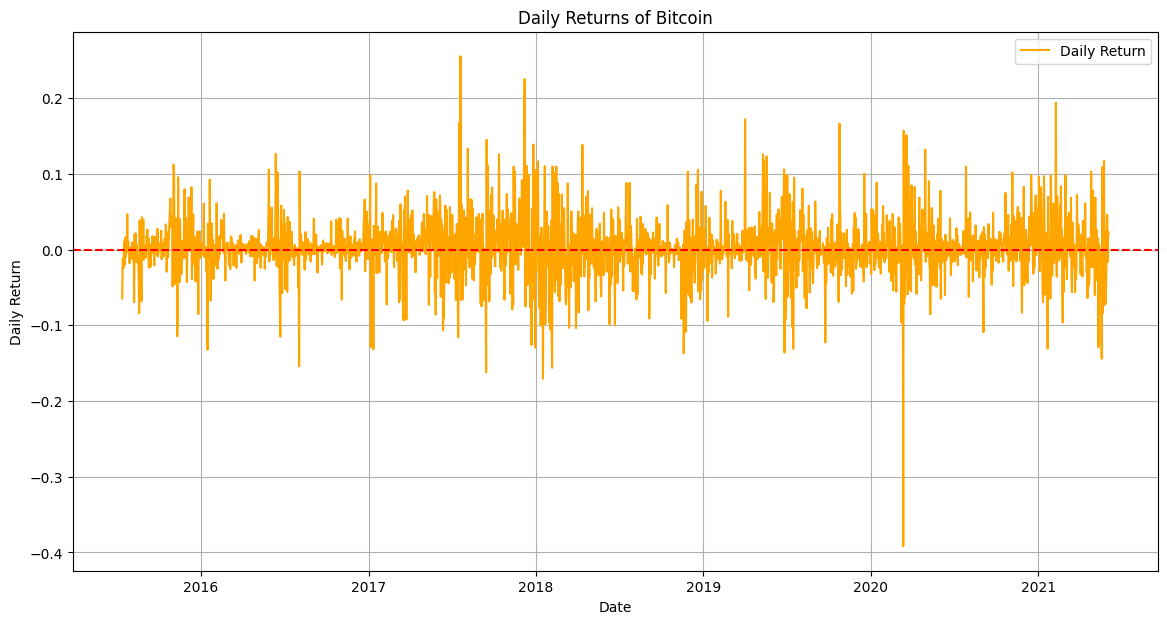

2. Daily Returns of Bitcoin:
Above plot illustrates the daily returns of Bitcoin, highlighting the percentage change in price from one day to the next.



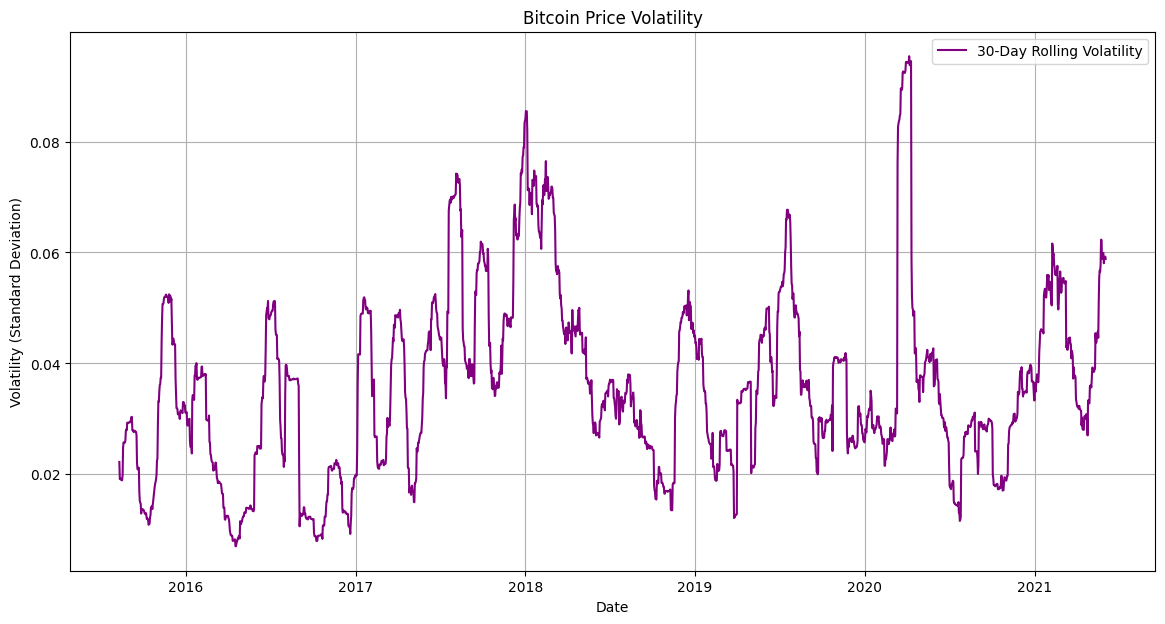

3. Bitcoin Price Volatility:
Above graph displays the 30-day rolling volatility of Bitcoin, indicating how much the price varies over time, which can signal potential risk.



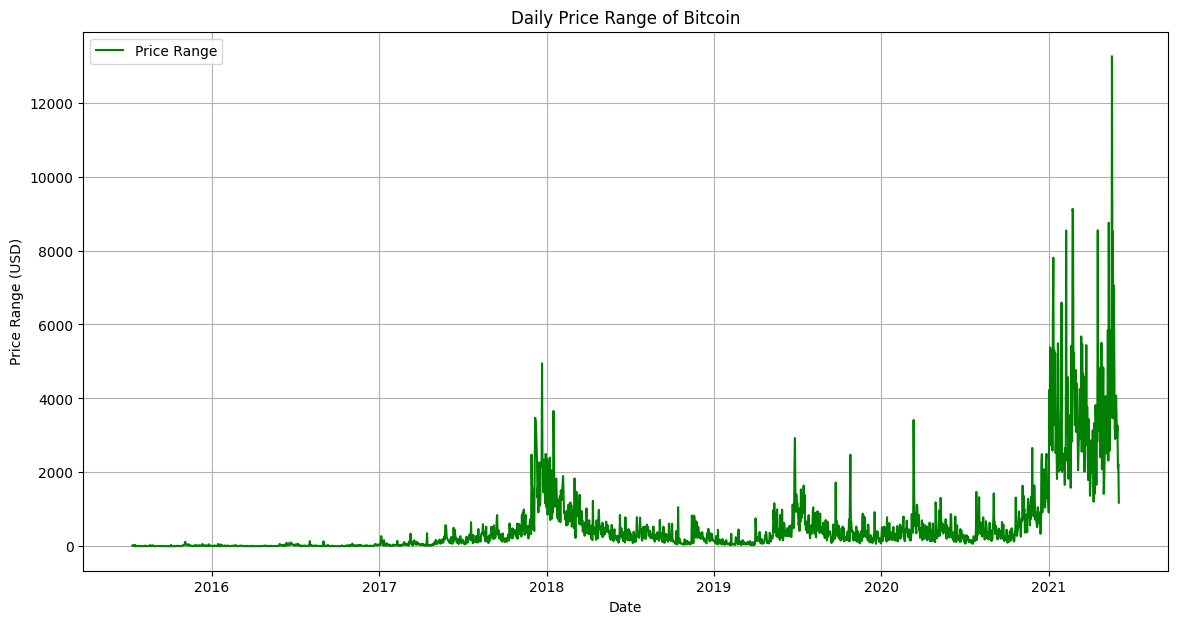

4. Daily Price Range of Bitcoin:
Above plot shows the daily price range of Bitcoin, calculated as the difference between the daily high and low prices, indicating market volatility.



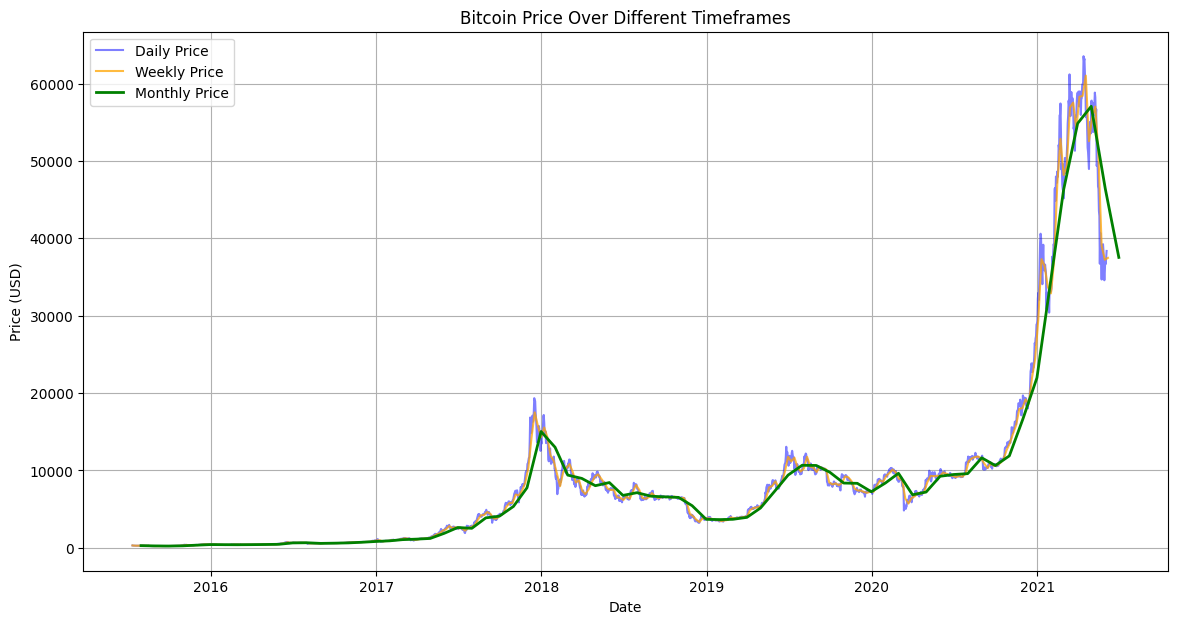

5. Bitcoin Price Over Different Timeframes:
Above plot compares Bitcoin prices over different timeframes: daily, weekly, and monthly averages, helping to smooth out short-term fluctuations.



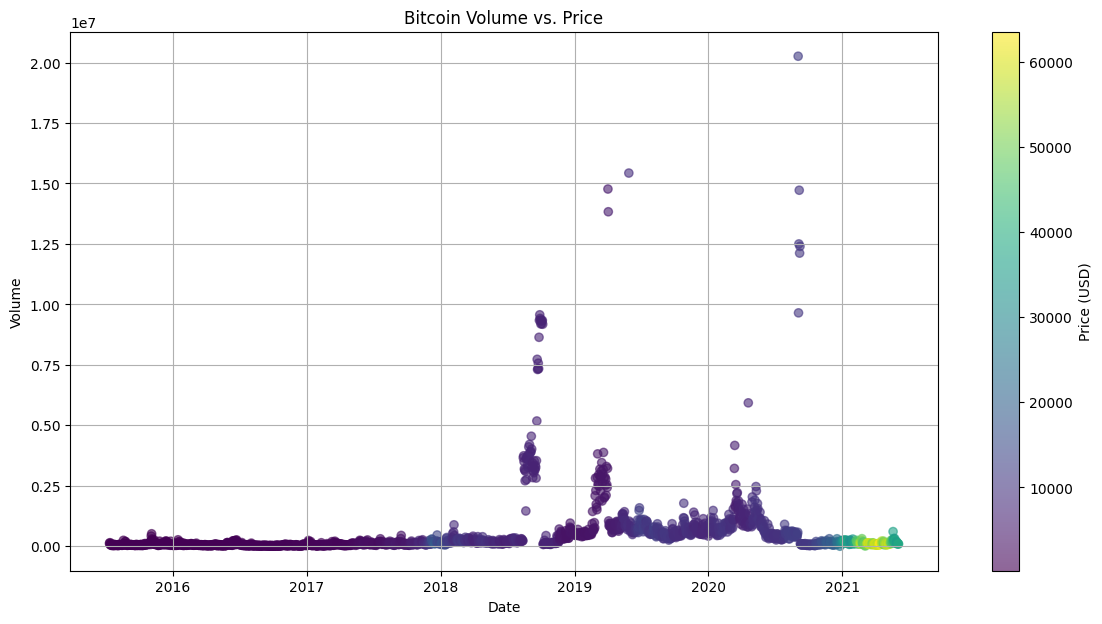

6. Bitcoin Volume vs. Price:
Above scatter plot illustrates the relationship between Bitcoin trading volume and price, where color intensity indicates the price level.



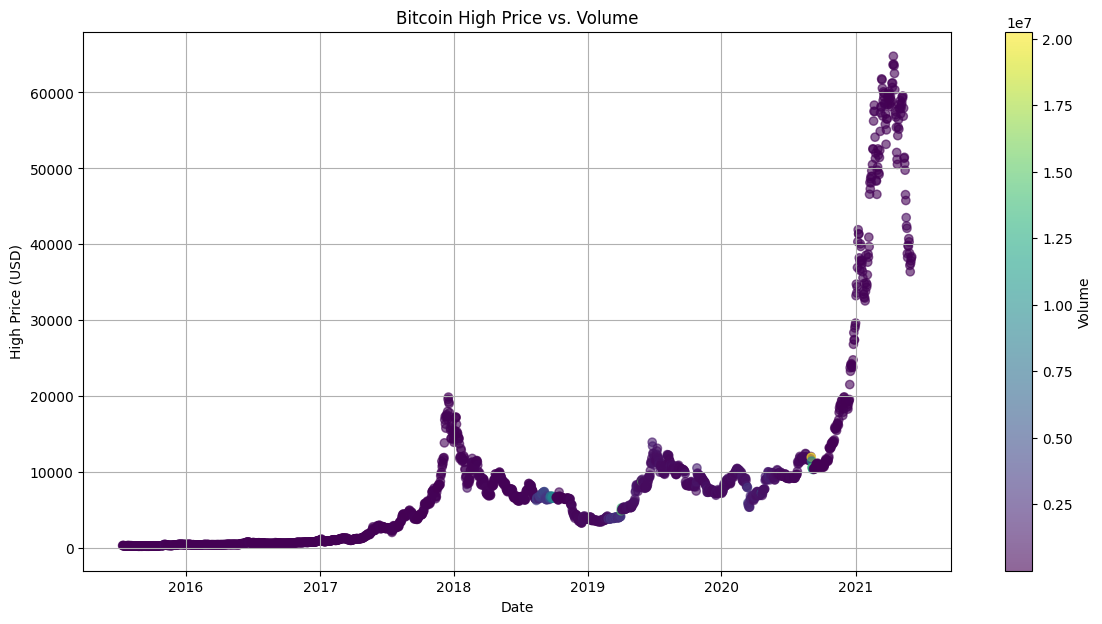

7. Bitcoin High Price vs. Volume:
Above scatter plot shows the relationship between the daily high price of Bitcoin and trading volume, providing insights into market dynamics.



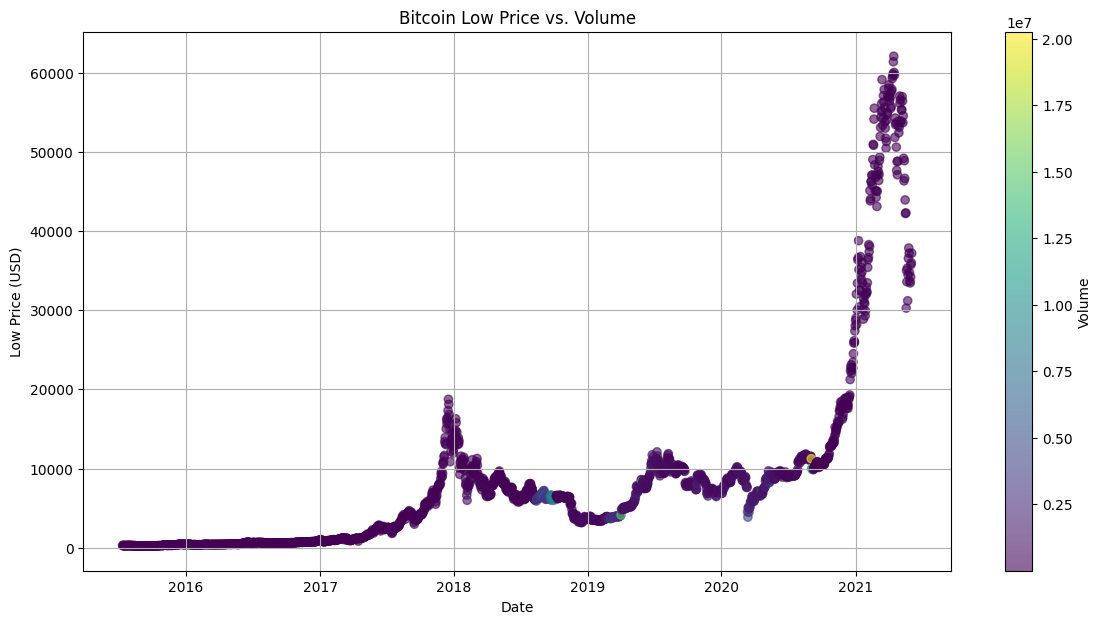

8. Bitcoin Low Price vs. Volume:
This scatter plot depicts the relationship between the daily low price of Bitcoin and trading volume, allowing us to analyze market trends.



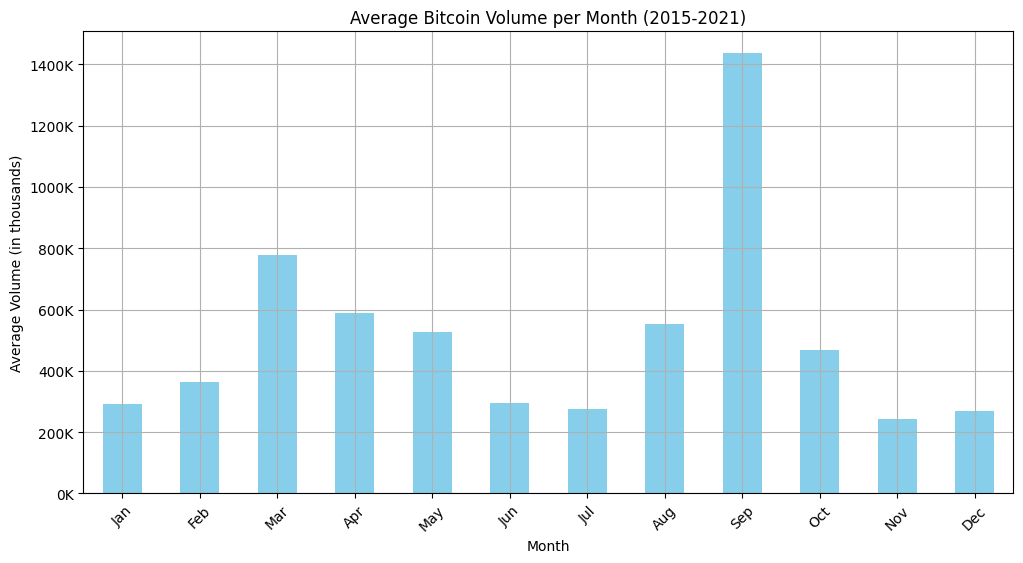

9. Average Bitcoin Volume per Month (2015-2021):
Above bar chart illustrates the average Bitcoin trading volume per month from 2015 to 2021, showing patterns of trading activity throughout the year.



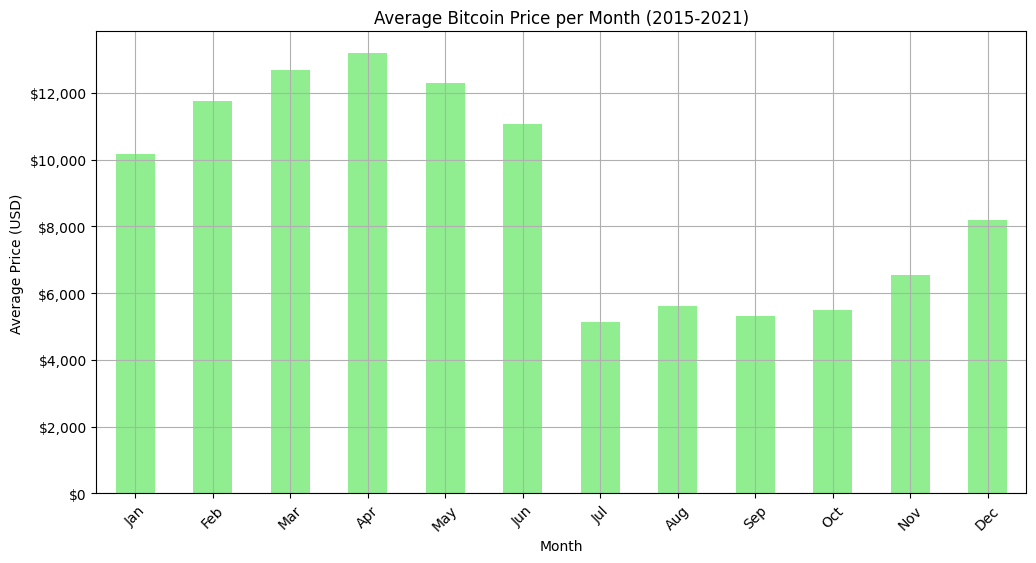

10. Average Bitcoin Price per Month (2015-2021):
Above bar chart shows the average Bitcoin price per month from 2015 to 2021, helping us identify seasonal trends in pricing.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load the Bitcoin dataset
data = pd.read_csv('cleaned_data.csv')

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Define formatter functions for y-axis
def format_price(x, pos):
    return f'${x:,.0f}'  # Format price as USD

def format_volume(x, pos):
    return f'{x/1_000:.0f}K'  # Format volume in thousands (K)

# 1. Plot the historical price movements
plt.figure(figsize=(14, 7))
plt.plot(data['price'], label='Price', color='blue')
plt.title('Historical Bitcoin Price Movements')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()
# Description for Historical Price Movements
print("1. Historical Bitcoin Price Movements:")
print("Above plot shows the historical price movements of Bitcoin over time, allowing us to identify trends and fluctuations in its value.\n")

# 2. Visualize Daily Returns without creating a new column
plt.figure(figsize=(14, 7))
plt.plot(data['price'].pct_change(), label='Daily Return', color='orange')
plt.title('Daily Returns of Bitcoin')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.grid()
plt.show()
# Description for Daily Returns
print("2. Daily Returns of Bitcoin:")
print("Above plot illustrates the daily returns of Bitcoin, highlighting the percentage change in price from one day to the next.\n")

# 3. Visualize Volatility (Standard Deviation of Daily Returns) without adding a new column
plt.figure(figsize=(14, 7))
volatility = data['price'].pct_change().rolling(window=30).std()  # Calculate rolling volatility directly
plt.plot(volatility, label='30-Day Rolling Volatility', color='purple')
plt.title('Bitcoin Price Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.grid()
plt.show()
# Description for Volatility
print("3. Bitcoin Price Volatility:")
print("Above graph displays the 30-day rolling volatility of Bitcoin, indicating how much the price varies over time, which can signal potential risk.\n")

# 4. Visualize Price Ranges without creating a new column
plt.figure(figsize=(14, 7))
price_range = data['high'] - data['low']  # Calculate price range directly
plt.plot(price_range, label='Price Range', color='green')
plt.title('Daily Price Range of Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price Range (USD)')
plt.legend()
plt.grid()
plt.show()
# Description for Price Range
print("4. Daily Price Range of Bitcoin:")
print("Above plot shows the daily price range of Bitcoin, calculated as the difference between the daily high and low prices, indicating market volatility.\n")

# 5. Price Changes over different timeframes (Daily, Weekly, Monthly)
daily_data = data.resample('D').mean()  # Daily average
weekly_data = data.resample('W').mean()  # Weekly average
monthly_data = data.resample('M').mean()  # Monthly average

plt.figure(figsize=(14, 7))
plt.plot(daily_data['price'], label='Daily Price', color='blue', alpha=0.5)
plt.plot(weekly_data['price'], label='Weekly Price', color='orange', alpha=0.75)
plt.plot(monthly_data['price'], label='Monthly Price', color='green', linewidth=2)
plt.title('Bitcoin Price Over Different Timeframes')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()
# Description for Price Changes over Timeframes
print("5. Bitcoin Price Over Different Timeframes:")
print("Above plot compares Bitcoin prices over different timeframes: daily, weekly, and monthly averages, helping to smooth out short-term fluctuations.\n")

# 6. Visualize Date vs. Volume vs. Price
plt.figure(figsize=(14, 7))
plt.scatter(data.index, data['vol.'], c=data['price'], cmap='viridis', alpha=0.6)
plt.title('Bitcoin Volume vs. Price')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.colorbar(label='Price (USD)')
plt.grid()
plt.show()
# Description for Volume vs. Price
print("6. Bitcoin Volume vs. Price:")
print("Above scatter plot illustrates the relationship between Bitcoin trading volume and price, where color intensity indicates the price level.\n")

# 7. Visualize Date vs. High vs. Volume
plt.figure(figsize=(14, 7))
plt.scatter(data.index, data['high'], c=data['vol.'], cmap='viridis', alpha=0.6)
plt.title('Bitcoin High Price vs. Volume')
plt.xlabel('Date')
plt.ylabel('High Price (USD)')
plt.colorbar(label='Volume')
plt.grid()
plt.show()
# Description for High Price vs. Volume
print("7. Bitcoin High Price vs. Volume:")
print("Above scatter plot shows the relationship between the daily high price of Bitcoin and trading volume, providing insights into market dynamics.\n")

# 8. Visualize Date vs. Low vs. Volume
plt.figure(figsize=(14, 7))
plt.scatter(data.index, data['low'], c=data['vol.'], cmap='viridis', alpha=0.6)
plt.title('Bitcoin Low Price vs. Volume')
plt.xlabel('Date')
plt.ylabel('Low Price (USD)')
plt.colorbar(label='Volume')
plt.grid()
plt.show()
# Description for Low Price vs. Volume
print("8. Bitcoin Low Price vs. Volume:")
print("This scatter plot depicts the relationship between the daily low price of Bitcoin and trading volume, allowing us to analyze market trends.\n")

# 9. Average Volume per Month
monthly_volume = data['vol.'].resample('M').mean()

# Create a new DataFrame for better plotting
monthly_volume_df = pd.DataFrame(monthly_volume)
monthly_volume_df['Month'] = monthly_volume_df.index.month
monthly_volume_df['Year'] = monthly_volume_df.index.year

# Group by month for overall average across years
avg_monthly_volume = monthly_volume_df.groupby('Month')['vol.'].mean()

plt.figure(figsize=(12, 6))
avg_monthly_volume.plot(kind='bar', color='skyblue')
plt.title('Average Bitcoin Volume per Month (2015-2021)')
plt.xlabel('Month')
plt.ylabel('Average Volume (in thousands)')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Set y-axis formatter for volume
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_volume))
plt.grid()
plt.show()
# Description for Average Volume per Month
print("9. Average Bitcoin Volume per Month (2015-2021):")
print("Above bar chart illustrates the average Bitcoin trading volume per month from 2015 to 2021, showing patterns of trading activity throughout the year.\n")

# 10. Average Price per Month
monthly_price = data['price'].resample('M').mean()

# Create a new DataFrame for better plotting
monthly_price_df = pd.DataFrame(monthly_price)
monthly_price_df['Month'] = monthly_price_df.index.month
monthly_price_df['Year'] = monthly_price_df.index.year

# Group by month for overall average across years
avg_monthly_price = monthly_price_df.groupby('Month')['price'].mean()

plt.figure(figsize=(12, 6))
avg_monthly_price.plot(kind='bar', color='lightgreen')
plt.title('Average Bitcoin Price per Month (2015-2021)')
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Set y-axis formatter for price
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price))
plt.grid()
plt.show()
# Description for Average Price per Month
print("10. Average Bitcoin Price per Month (2015-2021):")
print("Above bar chart shows the average Bitcoin price per month from 2015 to 2021, helping us identify seasonal trends in pricing.")


### Parametric and Non-Parametric Measures and its Comparation.

**Parametric measures** are statistical tools that assume the data follows a specific pattern or distribution. They provide insights based on these assumptions.

**Non-parametric measures** do not rely on any assumptions about the data's distribution. They offer a more flexible way to analyze data without preconceived notions about its shape.

In [9]:
# Parametric Measures
mean_price = data['price'].mean()
median_price = data['price'].median()
std_dev_price = data['price'].std()
variance_price = data['price'].var()

# Create a DataFrame to display these measures
parametric_measures = pd.DataFrame({
    'Measure': ['Mean', 'Median', 'Standard Deviation', 'Variance'],
    'Price (USD)': [mean_price, median_price, std_dev_price, variance_price]
})

print("Parametric Measures of Bitcoin Price:")
print(parametric_measures)

# Non-Parametric Measures
quantiles = data['price'].quantile([0.25, 0.5, 0.75])
iqr = quantiles[0.75] - quantiles[0.25]
mode_price = data['price'].mode()[0]  # Mode returns a Series; take the first value

# Create a DataFrame to display these measures
non_parametric_measures = pd.DataFrame({
    'Measure': ['1st Quartile (Q1)', 'Median', '3rd Quartile (Q3)', 'IQR', 'Mode'],
    'Price (USD)': [quantiles[0.25], quantiles[0.5], quantiles[0.75], iqr, mode_price]
})

print("\nNon-Parametric Measures of Bitcoin Price:")
print(non_parametric_measures)

# Combine parametric and non-parametric measures using concat
# Set 'Measure' as the index for both DataFrames
comparison = pd.concat([parametric_measures.set_index('Measure'), 
                        non_parametric_measures.set_index('Measure')], 
                       axis=1)

# Rename columns for clarity
comparison.columns = ['Price (USD) Parametric', 'Price (USD) NonParametric']

# Display the comparison
print("\nComparison of Parametric and Non-Parametric Measures:")
print(comparison)


Parametric Measures of Bitcoin Price:
              Measure   Price (USD)
0                Mean  8.649910e+03
1              Median  6.394950e+03
2  Standard Deviation  1.207130e+04
3            Variance  1.457164e+08

Non-Parametric Measures of Bitcoin Price:
             Measure  Price (USD)
0  1st Quartile (Q1)      896.000
1             Median     6394.950
2  3rd Quartile (Q3)     9578.575
3                IQR     8682.575
4               Mode      229.500

Comparison of Parametric and Non-Parametric Measures:
                    Price (USD) Parametric  Price (USD) NonParametric
Measure                                                              
Mean                          8.649910e+03                        NaN
Median                        6.394950e+03                   6394.950
Standard Deviation            1.207130e+04                        NaN
Variance                      1.457164e+08                        NaN
1st Quartile (Q1)                      NaN                  

<h2 style="color: lightgreen;">2. Handling Missing Values in Time Series</h2>

The data cleaning process involved manually removing unnecessary columns, specifically Twitter text, and eliminating empty rows to ensure a clean dataset. A check for missing values was also conducted to maintain data integrity for subsequent analyses.

In [10]:
# Step a: Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Step b: Handling missing values
if missing_values.any():
    print("\nHandling Missing Values:")
    
    # Option 1: Forward Fill
    data_ffill = data.ffill()
    print("Forward Fill completed.")
    # Display the number of missing values after handling
    print("Missing values after handling:\n", data.isnull().sum())
else:
    print("No missing values found in the dataset.")


Missing values in each column:
 price       0
open        0
high        0
low         0
vol.        0
change %    0
dtype: int64
No missing values found in the dataset.


<h2 style="color: orange;">3. Identifying Outliers in Time Series</h2>

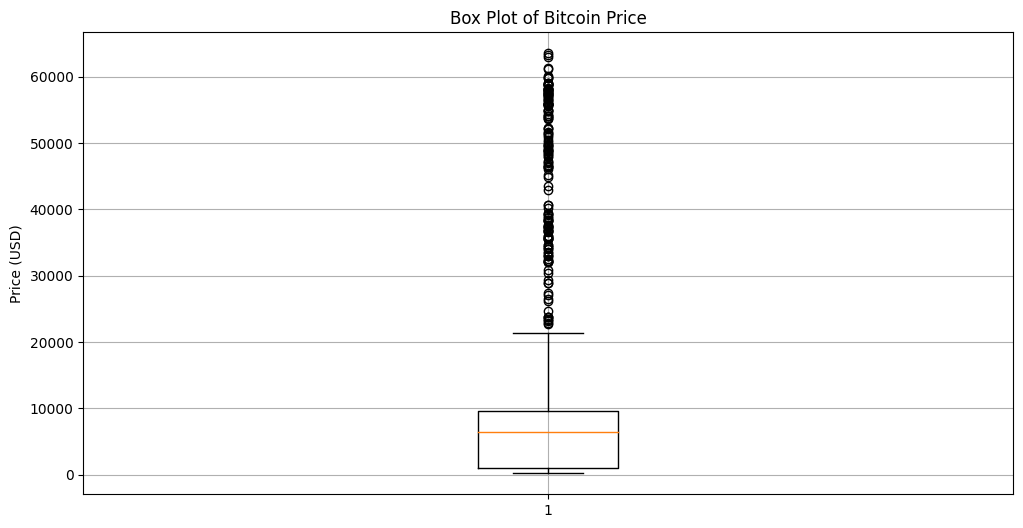

Outliers detected using Z-score:
               price   z_score
date                         
2021-02-08  46395.7  3.106537
2021-02-09  46508.6  3.115858
2021-02-11  47990.7  3.238222
2021-02-12  47371.7  3.187117
2021-02-13  47168.7  3.170357
...             ...       ...
2021-05-12  49384.2  3.353271
2021-05-13  49704.6  3.379724
2021-05-14  49839.8  3.390886
2021-05-15  46708.8  3.132387
2021-05-16  46426.4  3.109072

[97 rows x 2 columns]

Outliers detected using IQR:
               price
date               
2020-12-17  22825.4
2020-12-18  23127.9
2020-12-19  23844.0
2020-12-20  23474.9
2020-12-21  22728.5
...             ...
2021-05-30  35652.8
2021-05-31  37298.6
2021-06-01  36687.6
2021-06-02  37555.8
2021-06-03  38372.7

[169 rows x 1 columns]


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# a. Visualize Outliers

# 1. Box Plot
plt.figure(figsize=(12, 6))
plt.boxplot(data['price'])
plt.title('Box Plot of Bitcoin Price')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# b. Exploring Ways to Find Outliers

# Method 1: Using Z-score
threshold = 3  # Z-score threshold
mean_price = np.mean(data['price'])
std_dev_price = np.std(data['price'])

data['z_score'] = (data['price'] - mean_price) / std_dev_price
outliers_z = data[data['z_score'].abs() > threshold]

print("Outliers detected using Z-score:\n", outliers_z[['price', 'z_score']])

# Method 2: Using IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]
print("\nOutliers detected using IQR:\n", outliers_iqr[['price']])

### Checking for Stationarity.

In [12]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(data['price'])

# Extract the p-value from the result
p_value = result[1]
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print("The data is stationary.")
else:
    print("The data is non-stationary.")


ADF Statistic: -0.6537602535079126
p-value: 0.8583659982503165
The data is non-stationary.


### ACF and PCAF

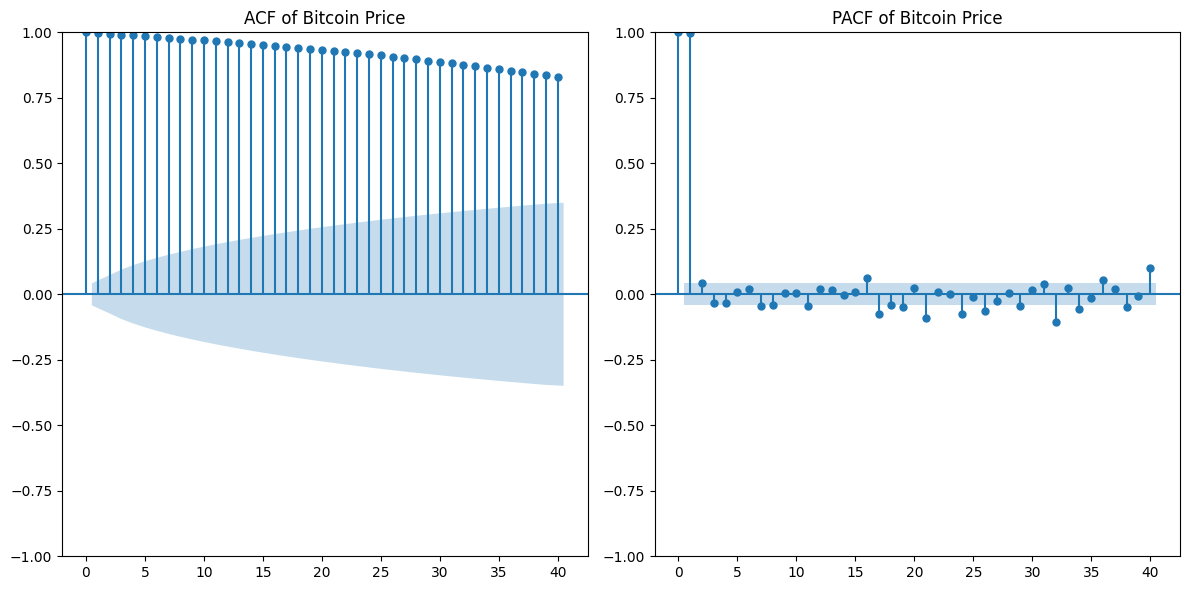

In [13]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set the figure size for ACF and PACF plots
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(data['price'], lags=40, ax=plt.gca())
plt.title('ACF of Bitcoin Price')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(data['price'], lags=40, ax=plt.gca())
plt.title('PACF of Bitcoin Price')

# Show the plots
plt.tight_layout()
plt.show()


<h1 style="color: RED;">SARIMA MODEL</h2>

### ACF and PACF Insights

We will be considering the values derived from the ACF and PACF plots for our SARIMA model. The ACF shows a gradual decline, suggesting the need for a moving average (MA) component, while the PACF indicates a significant correlation at lag 1, implying an autoregressive (AR) component. Therefore, we will initially set \( p = 1 \) and \( q = 1 \) for the SARIMA model, with \( d = 1 \) for differencing to ensure stationarity.

ADF Statistic: -0.6621647611297644
p-value: 0.8563078744667632
                                      SARIMAX Results                                       
Dep. Variable:                                price   No. Observations:                 2116
Model:             SARIMAX(2, 1, 5)x(1, 1, [1], 12)   Log Likelihood              -16857.227
Date:                              Wed, 16 Oct 2024   AIC                          33734.454
Time:                                      14:01:29   BIC                          33790.966
Sample:                                           0   HQIC                         33755.151
                                             - 2116                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8530      0.004   

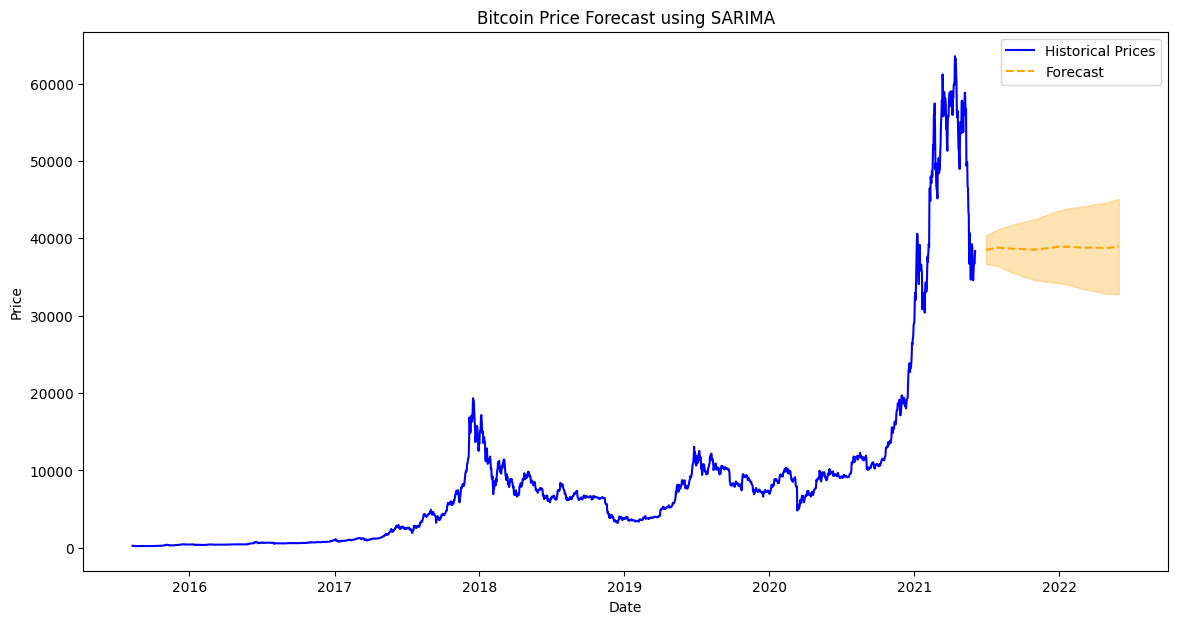

In [83]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Assuming the price column is named 'price'
prices = data['price']

# Perform ADF test for stationarity
adf_result = adfuller(prices)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# Define SARIMA model parameters
p = 2  # Auto-Regressive order
d = 1  # Differencing order
q = 5  # Moving Average order
P = 1  # Seasonal Auto-Regressive order
D = 1  # Seasonal Differencing order
Q = 1  # Seasonal Moving Average order
s = 12  # Seasonal period (e.g., 12 for monthly data)

# Fit the SARIMA model
sarima_model = SARIMAX(prices, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit(disp=False)

# Print the model summary
print(sarima_result.summary())

# Forecasting the next 12 periods
forecast = sarima_result.get_forecast(steps=12)
forecast_index = pd.date_range(start=prices.index[-1] + pd.DateOffset(1), periods=12, freq='M')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the original series and the forecast
plt.figure(figsize=(14, 7))
plt.plot(prices, label='Historical Prices', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange', linestyle='--')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='orange', alpha=0.3)
plt.title('Bitcoin Price Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [15]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split the data into training and testing sets
train_size = int(len(prices) * 0.8)  # 80% for training
train, test = prices[:train_size], prices[train_size:]

# Fit the SARIMA model on the training set
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit(disp=False)

# Forecast on the test set
forecast = sarima_result.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean

# Calculate accuracy metrics
mae = mean_absolute_error(test, forecast_values)
mse = mean_squared_error(test, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - forecast_values) / test)) * 100

# Print accuracy metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Absolute Error (MAE): 17700.108419392775
Mean Squared Error (MSE): 637500091.4804891
Root Mean Squared Error (RMSE): 25248.76415748876
Mean Absolute Percentage Error (MAPE): nan%


In [19]:
from pmdarima import auto_arima
import numpy as np

# Define the parameter grid for Randomized Search
param_grid = {
    'p': np.arange(0, 5),     # Auto-regressive terms
    'd': np.arange(0, 3),     # Differencing terms
    'q': np.arange(0, 5),     # Moving average terms
    'P': np.arange(0, 3),     # Seasonal auto-regressive terms
    'D': np.arange(0, 3),     # Seasonal differencing terms
    'Q': np.arange(0, 3),     # Seasonal moving average terms
}

# Run auto_arima with randomized search
sarima_model = auto_arima(data['price'], seasonal=True, m=12, 
                           stepwise=True, trace=True,
                           suppress_warnings=True, 
                           seasonal_order=param_grid)

print(sarima_model.summary())



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=33878.685, Time=2.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=33930.338, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=33898.844, Time=0.60 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=33900.960, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=33929.897, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=33881.310, Time=5.53 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=33881.010, Time=7.56 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=33880.031, Time=11.57 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=33879.859, Time=13.47 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=33902.659, Time=1.84 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=33884.451, Time=7.64 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=33883.732, Time=8.68 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=33877.573, Time=24.45 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=33868.725, Time=24.44 sec
 

In [85]:
# Import necessary libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Sample data (replace this with your actual time series data)
# prices = pd.Series(...)  # Your time series data here

# Split the data into training and testing sets
train_size = int(len(prices) * 0.8)  # 80% for training
train, test = prices[:train_size], prices[train_size:]

# Fit the SARIMA model on the training set
p, d, q = 2, 1, 5  # Example parameters for ARIMA
P, D, Q, s = 1, 0, 1, 12  # Seasonal parameters
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit(disp=False)

# Print the summary of the SARIMA model
print(sarima_result.summary())

# Forecast on the test set
forecast = sarima_result.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean

# Calculate accuracy metrics
mae = mean_absolute_error(test, forecast_values)
mse = mean_squared_error(test, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - forecast_values) / test)) * 100

# Print accuracy metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


                                      SARIMAX Results                                       
Dep. Variable:                                price   No. Observations:                 1692
Model:             SARIMAX(2, 1, 5)x(1, 0, [1], 12)   Log Likelihood              -12076.039
Date:                              Wed, 16 Oct 2024   AIC                          24172.077
Time:                                      14:06:29   BIC                          24226.408
Sample:                                           0   HQIC                         24192.196
                                             - 1692                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1759      0.011   -103.341      0.000      -1.198      -1.154
ar.L2         -0.95

ADF Statistic: -0.6537602535079126
p-value: 0.8583659982503165
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=33878.685, Time=2.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=33930.338, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=33898.844, Time=0.56 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=33900.960, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=33929.897, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=33881.310, Time=5.29 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=33881.010, Time=7.30 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=33880.031, Time=11.59 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=33879.859, Time=12.86 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=33902.659, Time=1.93 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=33884.451, Time=8.02 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=33883.732, Time=9.12 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=33877.573, Time=23.78 sec
 ARIMA(

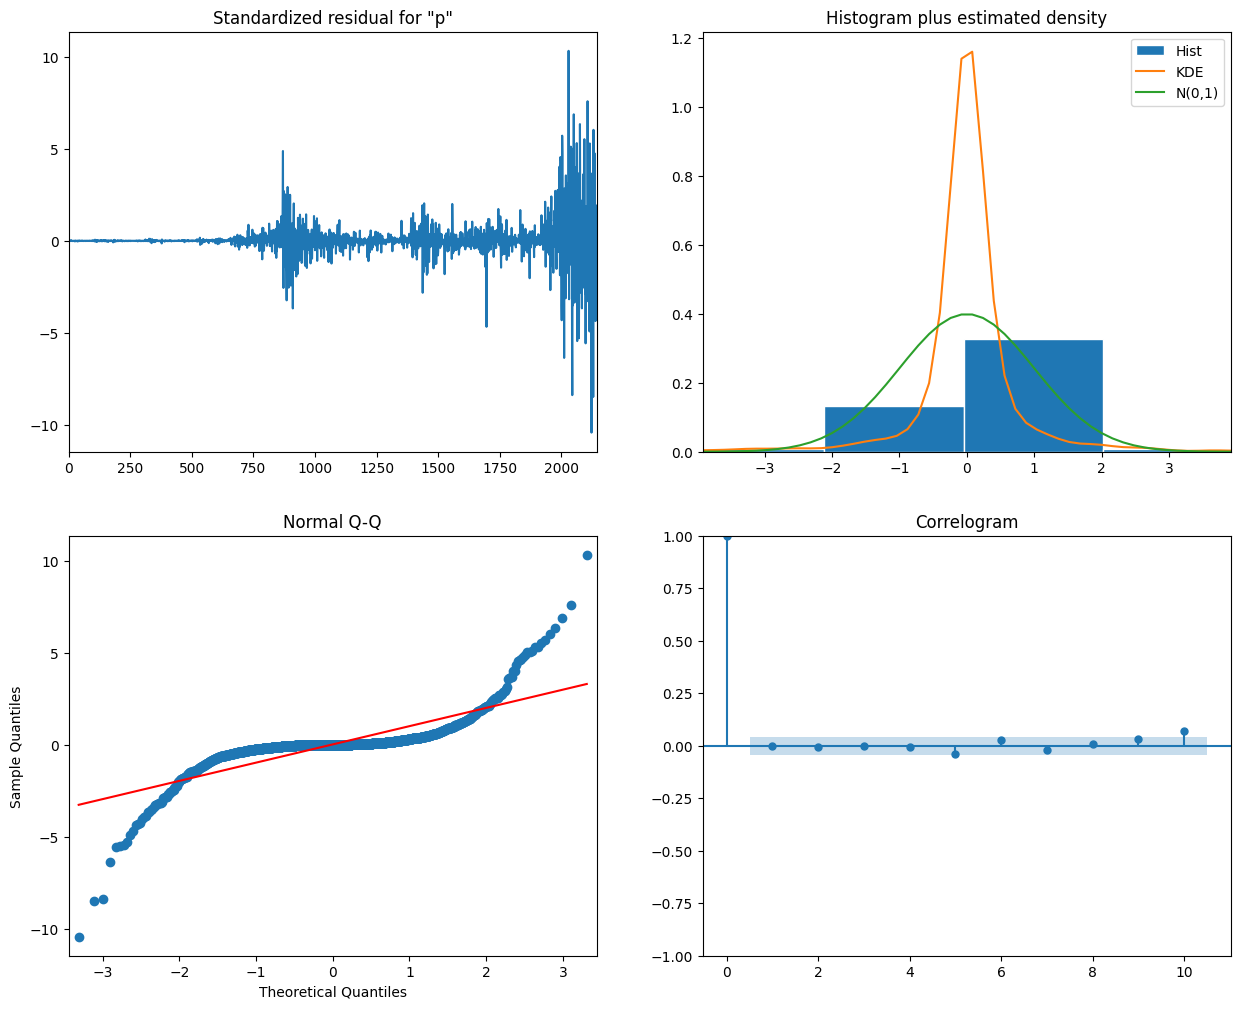

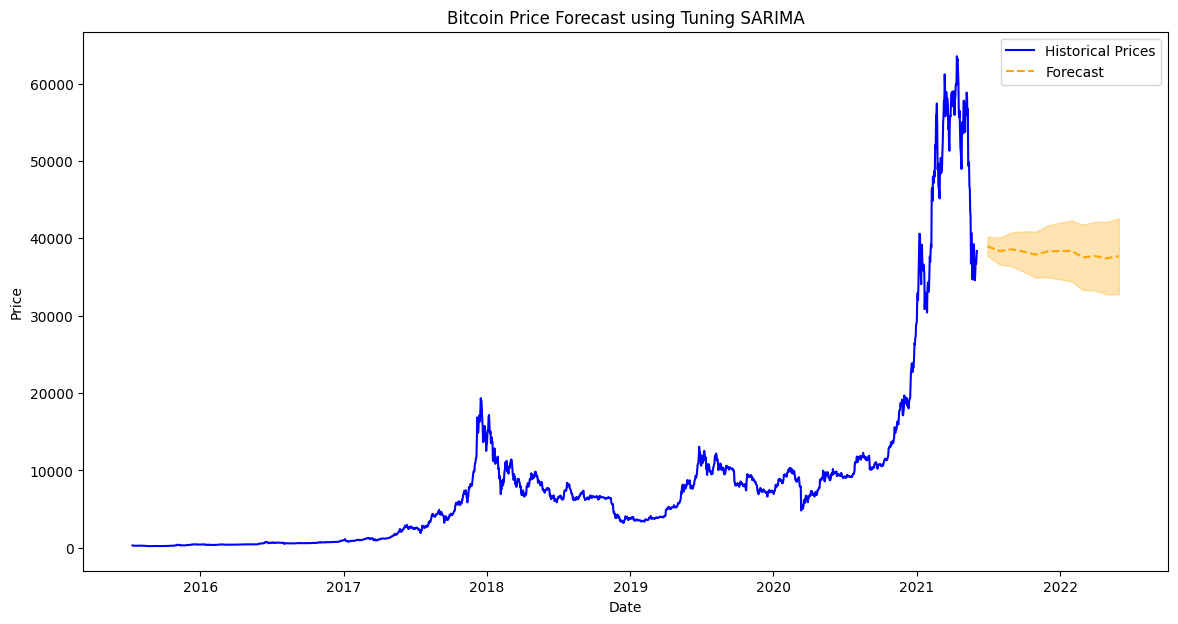

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the cleaned Bitcoin dataset
data = pd.read_csv('cleaned_data.csv', parse_dates=['date'], index_col='date')
prices = data['price']

# Check for stationarity using the ADF test
adf_result = adfuller(prices)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# Perform the automatic parameter tuning
model = auto_arima(prices,
                   seasonal=True,       # Indicates we want to fit a seasonal model
                   m=12,                # Seasonal period (12 for monthly data)
                   stepwise=True,       # Stepwise search
                   suppress_warnings=True, # Suppress warnings
                   trace=True)          # Show the search process

print(model.summary())

# Fit the SARIMA model with the best parameters
p, d, q = model.orderpo
P, D, Q, s = model.seasonal_order

sarima_model = SARIMAX(prices, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit(disp=False)

# Check model diagnostics
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecasting the next 12 periods
forecast = sarima_result.get_forecast(steps=12)
forecast_index = pd.date_range(start=prices.index[-1] + pd.DateOffset(1), periods=12, freq='M')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(prices, label='Historical Prices', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange', linestyle='--')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='orange', alpha=0.3)
plt.title('Bitcoin Price Forecast using Tuning SARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [86]:
# Import necessary libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Sample data (replace this with your actual time series data)
# prices = pd.Series(...)  # Your time series data here

# Split the data into training and testing sets
train_size = int(len(prices) * 0.8)  # 80% for training
train, test = prices[:train_size], prices[train_size:]

# Fit the SARIMA model on the training set
p, d, q = 2, 1, 5  # Example parameters for ARIMA
P, D, Q, s = 1, 0, 1, 12  # Seasonal parameters
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit(disp=False)

# Print the summary of the SARIMA model
print(sarima_result.summary())

# Forecast on the test set
forecast = sarima_result.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean

# Calculate accuracy metrics
mae = mean_absolute_error(test, forecast_values)
mse = mean_squared_error(test, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - forecast_values) / test)) * 100

# Print accuracy metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


                                      SARIMAX Results                                       
Dep. Variable:                                price   No. Observations:                 1692
Model:             SARIMAX(2, 1, 5)x(1, 0, [1], 12)   Log Likelihood              -12076.039
Date:                              Wed, 16 Oct 2024   AIC                          24172.077
Time:                                      14:10:10   BIC                          24226.408
Sample:                                           0   HQIC                         24192.196
                                             - 1692                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1759      0.011   -103.341      0.000      -1.198      -1.154
ar.L2         -0.95

# <h1 style="color: GREEN;">FACEBOOK PROPHET MODEL</h2>

13:18:48 - cmdstanpy - INFO - Chain [1] start processing
13:18:48 - cmdstanpy - INFO - Chain [1] done processing


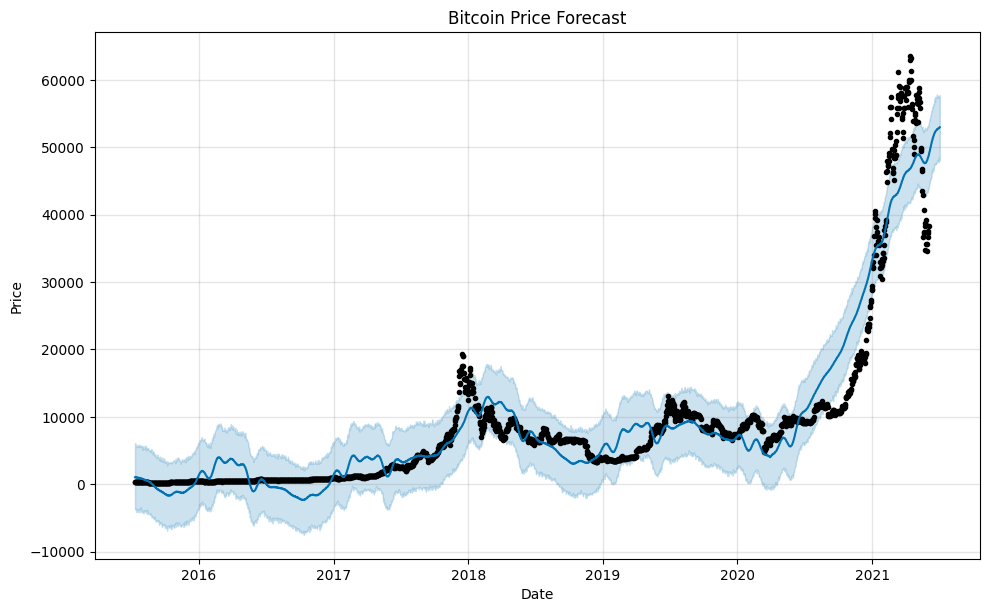

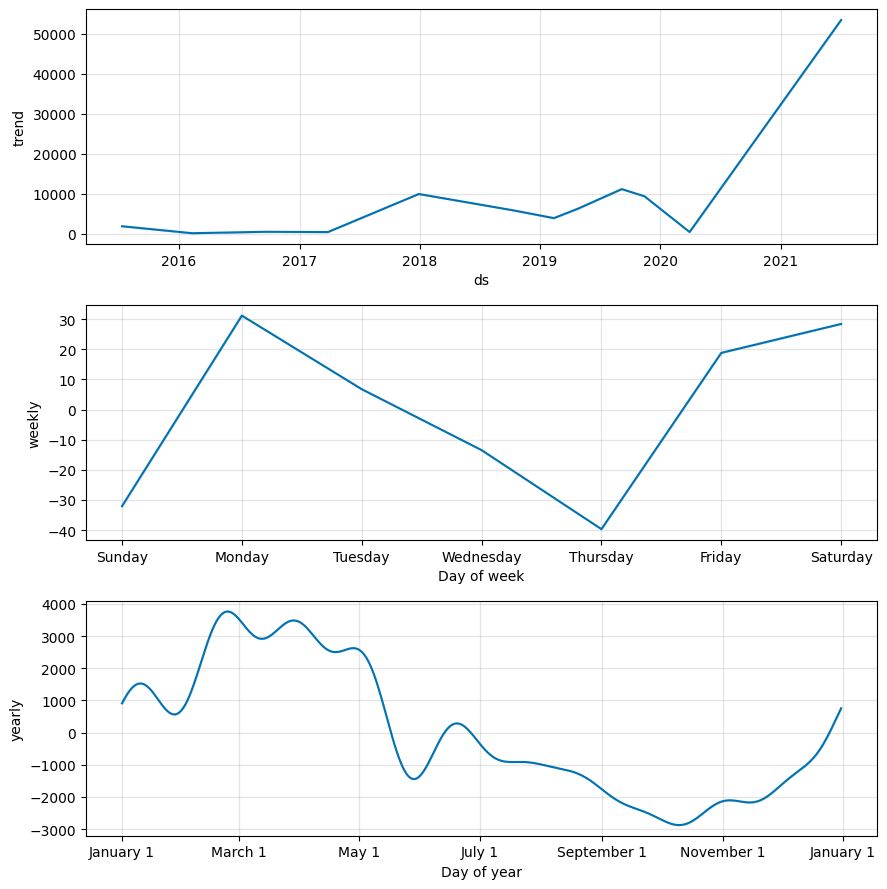

In [67]:
# Install Prophet if you haven't already
# !pip install prophet

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load your data
data = pd.read_csv('cleaned_data.csv')  # Replace with your actual file path

# Prepare data for Prophet
prophet_data = data[['date', 'price']]  # Adjust column names as needed
prophet_data.columns = ['ds', 'y']  # Rename columns to match Prophet's requirements

# Create and fit the model
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future = model.make_future_dataframe(periods=30)  # Adjust periods for how far ahead you want to predict
forecast = model.predict(future)

# Visualize the results
fig = model.plot(forecast)
plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Visualize the trend and seasonal components
fig2 = model.plot_components(forecast)
plt.show()


<h2 style="color: blue;">Getting the MAE with Just Covid holiday</h2>

15:11:22 - cmdstanpy - INFO - Chain [1] start processing
15:11:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 14646.019606702765
Mean Squared Error (MSE): 520094666.19298583
Root Mean Squared Error (RMSE): 22805.584101114047
Mean Absolute Percentage Error (MAPE): 37.759673620407405%


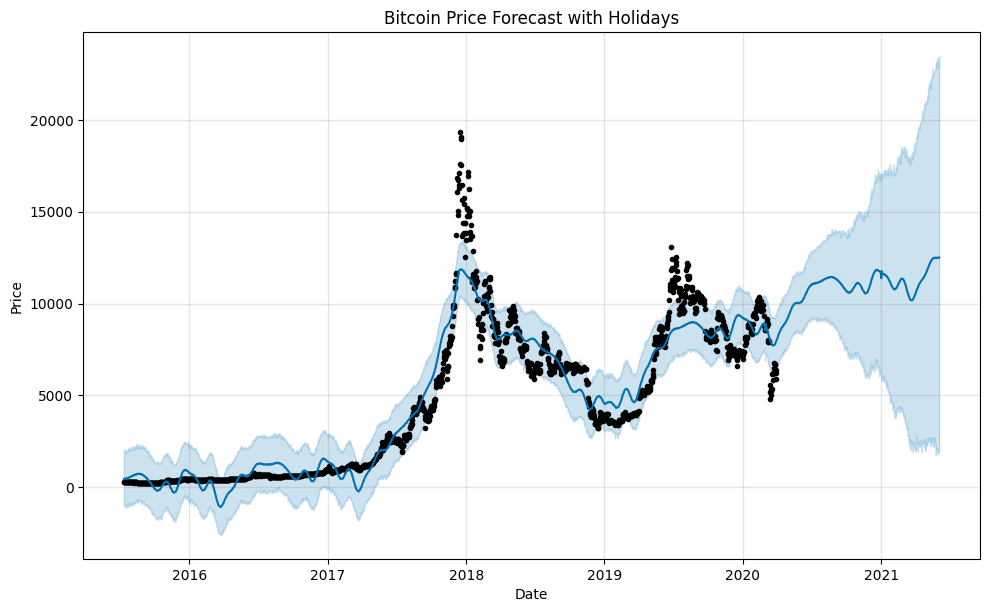

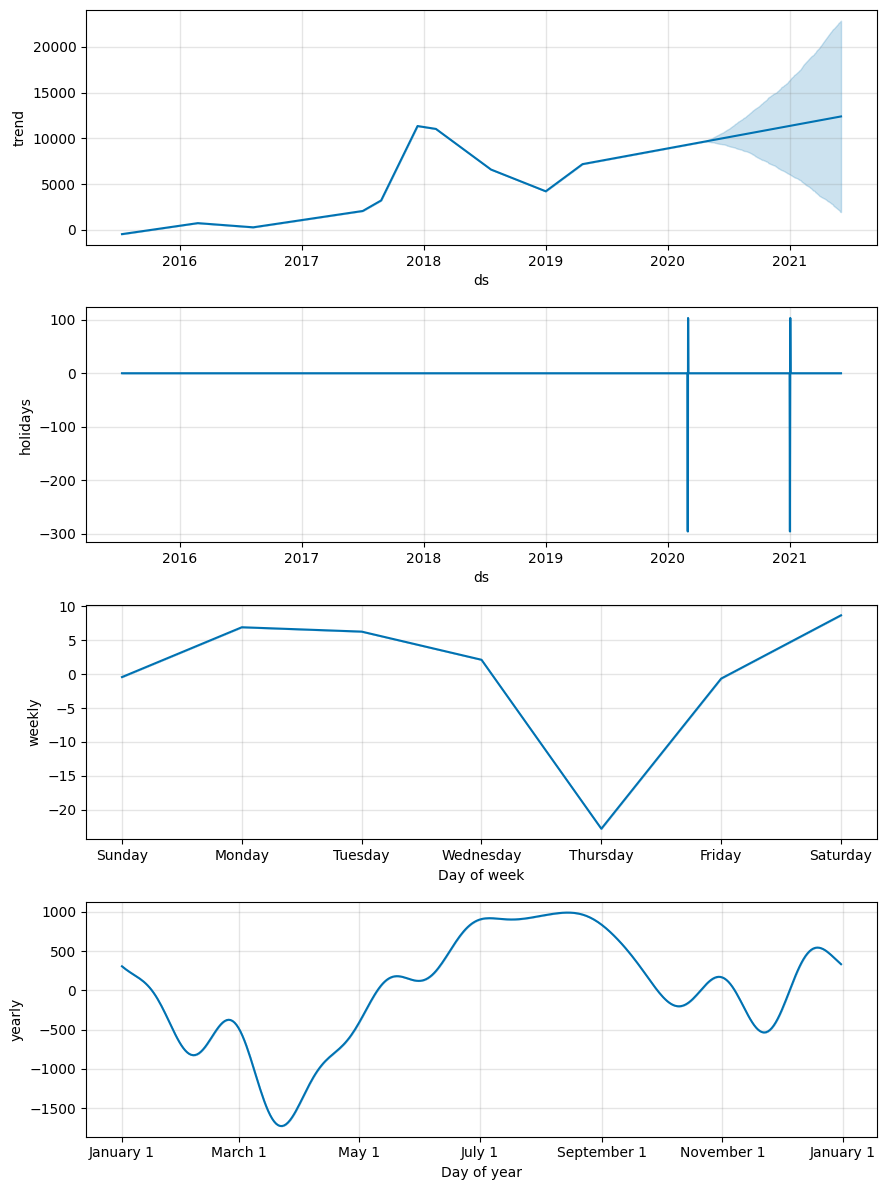

In [109]:
# import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Define holidays
holidays = pd.DataFrame({
    'holiday': 'COVID_Holiday',
    'ds': pd.to_datetime(['2020-03-01', '2021-01-01', '2021-07-01']),
    'lower_window': 0,
    'upper_window': 1,  # Adjust this based on how long the effect lasts
})

# Prepare data for Prophet
prophet_data = data[['date', 'price']]  # Adjust column names as needed
prophet_data.columns = ['ds', 'y']  # Rename columns to match Prophet's requirements

# Split the dataset into training and testing
train_size = int(len(prophet_data) * 0.8)  # 80% for training, 20% for testing
train, test = prophet_data[:train_size], prophet_data[train_size:]

# Create and fit the model, including holidays
model = Prophet(holidays=holidays)
model.fit(train)

# Make future predictions
future = model.make_future_dataframe(periods=len(test))  # Predict the length of the test set
forecast = model.predict(future)

# Extract the predicted values for the test set
forecast_test = forecast[-len(test):]  # Get the forecasted values corresponding to the test set

# Calculate accuracy metrics
mae = mean_absolute_error(test['y'], forecast_test['yhat'])
mse = mean_squared_error(test['y'], forecast_test['yhat'])
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(test['y'], forecast_test['yhat'])

# Print accuracy metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100}%')

# Visualize the results
fig = model.plot(forecast)
plt.title('Bitcoin Price Forecast with Holidays')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Visualize the trend and seasonal components
fig2 = model.plot_components(forecast)
plt.show()


###  From Above we Notices that, The MAE improved from ~14900 to 14646

<h3 style="color: Orange;">Fitting the model, including holidays (Inclusive of Covid peak times),Changepoint Scaling,   and seasonality scale.</h3>

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Define holidays
holidays = pd.DataFrame({
    'holiday': 'COVID_Holiday',
    'ds': pd.to_datetime(['2020-03-01', '2021-01-01', '2021-07-01']),
    'lower_window': 0,
    'upper_window': 1,  # Adjust this based on how long the effect lasts
})

# Prepare data for Prophet
prophet_data = data[['date', 'price']]  # Adjust column names as needed
prophet_data.columns = ['ds', 'y']  # Rename columns to match Prophet's requirements

# Split the dataset into training and testing
train_size = int(len(prophet_data) * 0.8)  # 80% for training, 20% for testing
train, test = prophet_data[:train_size], prophet_data[train_size:]

# Create and fit the model, including holidays, seasonality mode, and scaling parameters
model = Prophet(
    holidays=holidays,
    seasonality_mode='additive',          # Additive seasonality mode
    changepoint_prior_scale=0.02,          # Adjust flexibility for trend changes
    seasonality_prior_scale=0.49            # Adjust flexibility for seasonal component
)

# Fit the model
model.fit(train)

# Make future predictions
future = model.make_future_dataframe(periods=len(test))  # Predict the length of the test set
forecast = model.predict(future)

# Extract the predicted values for the test set
forecast_test = forecast[-len(test):]  # Get the forecasted values corresponding to the test set

# Calculate accuracy metrics
mae = mean_absolute_error(test['y'], forecast_test['yhat'])
mse = mean_squared_error(test['y'], forecast_test['yhat'])
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(test['y'], forecast_test['yhat'])

# Print accuracy metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100}%')



14:55:41 - cmdstanpy - INFO - Chain [1] start processing
14:55:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 14094.316792599471
Mean Squared Error (MSE): 483722610.01791227
Root Mean Squared Error (RMSE): 21993.69477868401
Mean Absolute Percentage Error (MAPE): 36.862938846381944%


15:28:30 - cmdstanpy - INFO - Chain [1] start processing
15:28:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 14094.316792599471
Mean Squared Error (MSE): 483722610.01791227
Root Mean Squared Error (RMSE): 21993.69477868401
Mean Absolute Percentage Error (MAPE): 36.862938846381944%


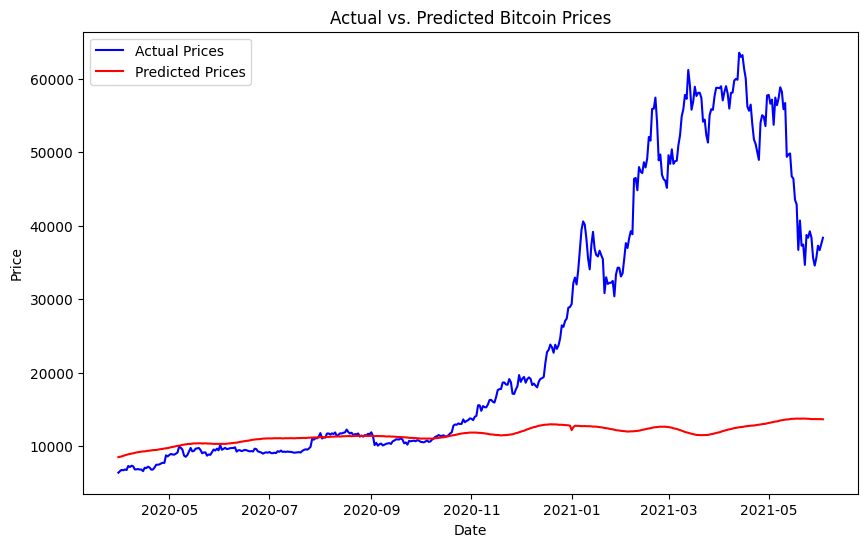

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Define holidays
holidays = pd.DataFrame({
    'holiday': 'COVID_Holiday',
    'ds': pd.to_datetime(['2020-03-01', '2021-01-01', '2021-07-01']),
    'lower_window': 0,
    'upper_window': 1,  # Adjust this based on how long the effect lasts
})

# Prepare data for Prophet
prophet_data = data[['date', 'price']]  # Adjust column names as needed
prophet_data.columns = ['ds', 'y']  # Rename columns to match Prophet's requirements

# Split the dataset into training and testing
train_size = int(len(prophet_data) * 0.8)  # 80% for training, 20% for testing
train, test = prophet_data[:train_size], prophet_data[train_size:]

# Create and fit the model, including holidays, seasonality mode, and scaling parameters
model = Prophet(
    holidays=holidays,
    seasonality_mode='additive',          # Additive seasonality mode
    changepoint_prior_scale=0.02,         # Adjust flexibility for trend changes
    seasonality_prior_scale=0.49          # Adjust flexibility for seasonal component
)

# Fit the model
model.fit(train)

# Make future predictions
future = model.make_future_dataframe(periods=len(test))  # Predict the length of the test set
forecast = model.predict(future)

# Extract the predicted values for the test set
forecast_test = forecast[-len(test):]  # Get the forecasted values corresponding to the test set

# Calculate accuracy metrics
mae = mean_absolute_error(test['y'], forecast_test['yhat'])
mse = mean_squared_error(test['y'], forecast_test['yhat'])
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(test['y'], forecast_test['yhat'])

# Print accuracy metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100}%')

# Ensure the 'ds' column is in datetime format for train and test sets
train['ds'] = pd.to_datetime(train['ds'])
test['ds'] = pd.to_datetime(test['ds'])

# Ensure the 'ds' column in the forecast is also in datetime format
forecast['ds'] = pd.to_datetime(forecast['ds'])
forecast_test['ds'] = pd.to_datetime(forecast_test['ds'])

# Plot the actual test prices and predicted prices
plt.figure(figsize=(10, 6))

# Plot the actual prices (from the test set)
plt.plot(test['ds'], test['y'], label='Actual Prices', color='blue')

# Plot the predicted prices (from the forecast)
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted Prices', color='red')

# Add title and labels
plt.title('Actual vs. Predicted Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Add legend
plt.legend()

# Show the plot
plt.show()



15:28:40 - cmdstanpy - INFO - Chain [1] start processing
15:28:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 14094.316792599471
Mean Squared Error (MSE): 483722610.01791227
Root Mean Squared Error (RMSE): 21993.69477868401
Mean Absolute Percentage Error (MAPE): 36.862938846381944%


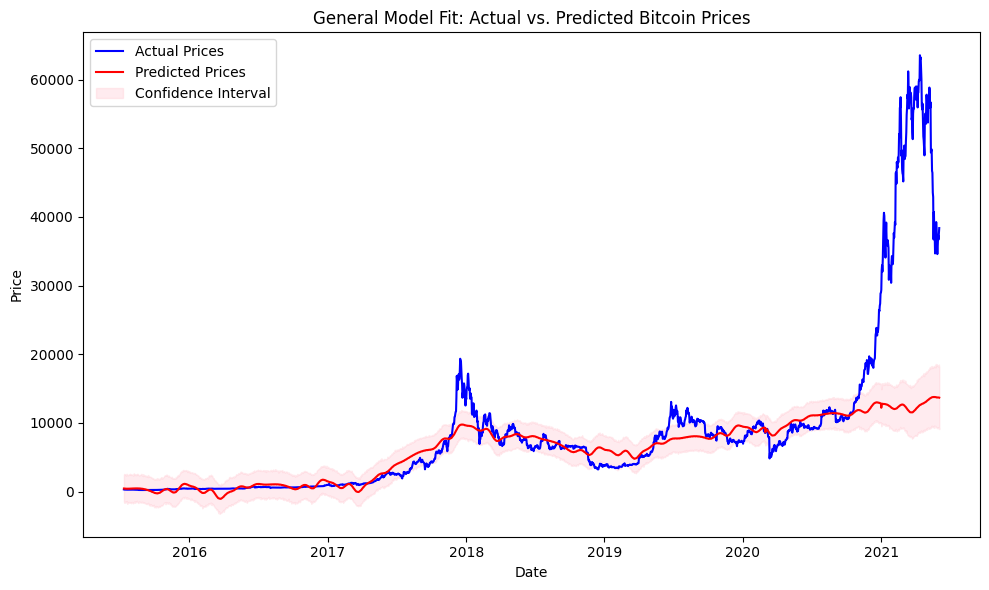

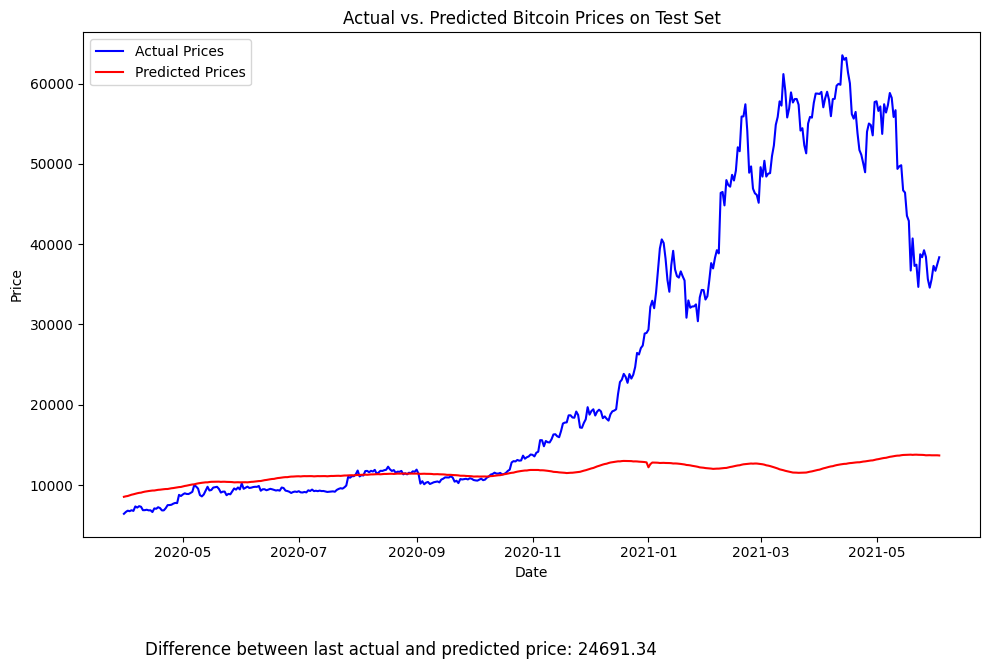

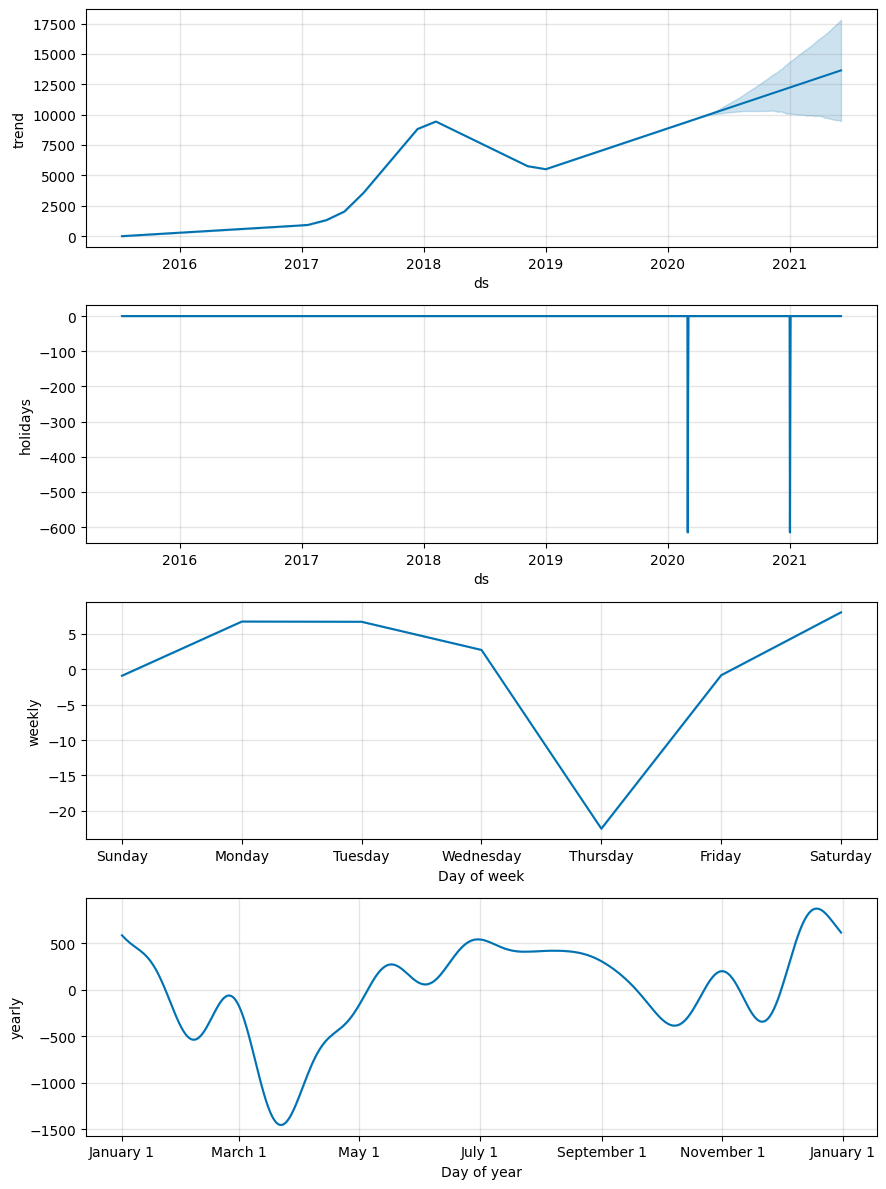

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Sample data for demonstration purposes
# Replace this with your actual data
# Example:
# data = pd.read_csv('your_data.csv')
# data should have columns 'date' and 'price'

# Define holidays
holidays = pd.DataFrame({
    'holiday': 'COVID_Holiday',
    'ds': pd.to_datetime(['2020-03-01', '2021-01-01', '2021-07-01']),
    'lower_window': 0,
    'upper_window': 1,  # Adjust this based on how long the effect lasts
})

# Prepare data for Prophet
# Ensure 'date' is in datetime format if not already
data['date'] = pd.to_datetime(data['date'])  # Ensure 'date' column is in datetime format
prophet_data = data[['date', 'price']]  # Adjust column names as needed
prophet_data.columns = ['ds', 'y']  # Rename columns to match Prophet's requirements

# Split the dataset into training and testing
train_size = int(len(prophet_data) * 0.8)  # 80% for training, 20% for testing
train, test = prophet_data[:train_size], prophet_data[train_size:]

# Create and fit the model, including holidays, seasonality mode, and scaling parameters
model = Prophet(
    holidays=holidays,
    seasonality_mode='additive',          # Additive seasonality mode
    changepoint_prior_scale=0.02,         # Adjust flexibility for trend changes
    seasonality_prior_scale=0.49           # Adjust flexibility for seasonal component
)

# Fit the model
model.fit(train)

# Make future predictions
future = model.make_future_dataframe(periods=len(test))  # Predict the length of the test set
forecast = model.predict(future)

# Extract the predicted values for the test set
forecast_test = forecast[-len(test):]  # Get the forecasted values corresponding to the test set

# Calculate accuracy metrics
mae = mean_absolute_error(test['y'], forecast_test['yhat'])
mse = mean_squared_error(test['y'], forecast_test['yhat'])
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(test['y'], forecast_test['yhat'])

# Print accuracy metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100}%')

# Ensure the 'ds' column is in datetime format for train and test sets
train['ds'] = pd.to_datetime(train['ds'])
test['ds'] = pd.to_datetime(test['ds'])

# Ensure the 'ds' column in the forecast is also in datetime format
forecast['ds'] = pd.to_datetime(forecast['ds'])
forecast_test['ds'] = pd.to_datetime(forecast_test['ds'])

# Calculate the difference between the last actual and predicted price
last_actual = test['y'].iloc[-1]
last_predicted = forecast_test['yhat'].iloc[-1]
difference = last_actual - last_predicted

# 1. General Model Fit: Actual vs. Predicted Prices with Confidence Intervals
plt.figure(figsize=(10, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual Prices', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Prices', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title('General Model Fit: Actual vs. Predicted Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Actual vs. Predicted Prices on Test Set
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual Prices', color='blue')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted Prices', color='red')
plt.title('Actual vs. Predicted Bitcoin Prices on Test Set')
plt.xlabel('Date')
plt.ylabel('Price')
plt.figtext(0.15, -0.1, f'Difference between last actual and predicted price: {difference:.2f}', 
            fontsize=12, ha='left')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Trend and Seasonal Components
fig2 = model.plot_components(forecast)
plt.show()


# MODEL-1 COMPLETE- WITH FINAL MAE DIFFERENCE OF [~14,094], (Price difference from actual and predctive)